# Final Project Submission - Khant's Wine Categorization Project

Student Name - Khant Razar Kyaw

Student ID - PIUS20230009

Course Name - CS 300: Introduction to Machine Learning

## Development File

### Project Information

Project Name - Khant's Wine Categorization Project

Dataset - Wine Clustering Dataset

Dataset Source - https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering



### 1. Data Loading & Preprocessing

In [1]:
# Python Library Installation

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Sklearn library Installation

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
# import pickle

import pickle

In [4]:
df = pd.read_csv('wine_dataset.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### 1.1 Dataset Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.shape

(178, 13)

There are 13 columns with 178 instances. 

In [7]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [8]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

After explorating columns, we found that there are 13 features in total, and we will make a clustering based on 13 features.

In [9]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There is no missing values in dataset.

#### 1.2 Exploratory Data Analysis

In [10]:
# EDA for Numerical columns

df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

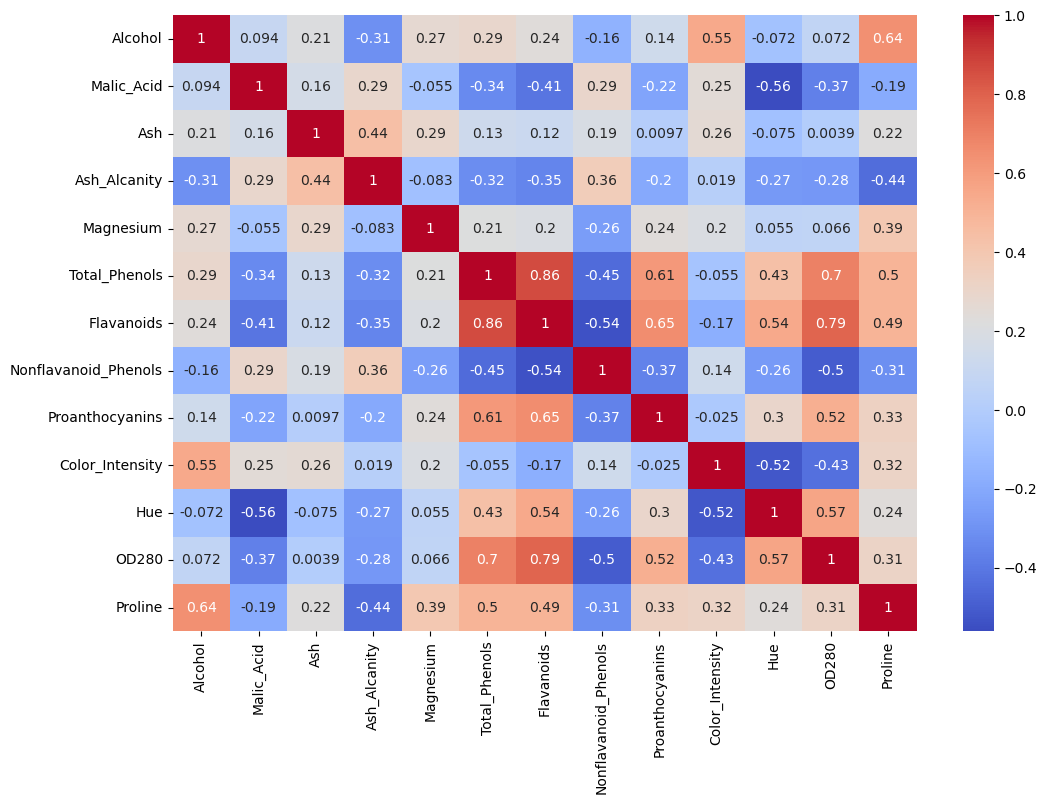

In [11]:
# heatmap

plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic_Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Ash_Alcanity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_Phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_Intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

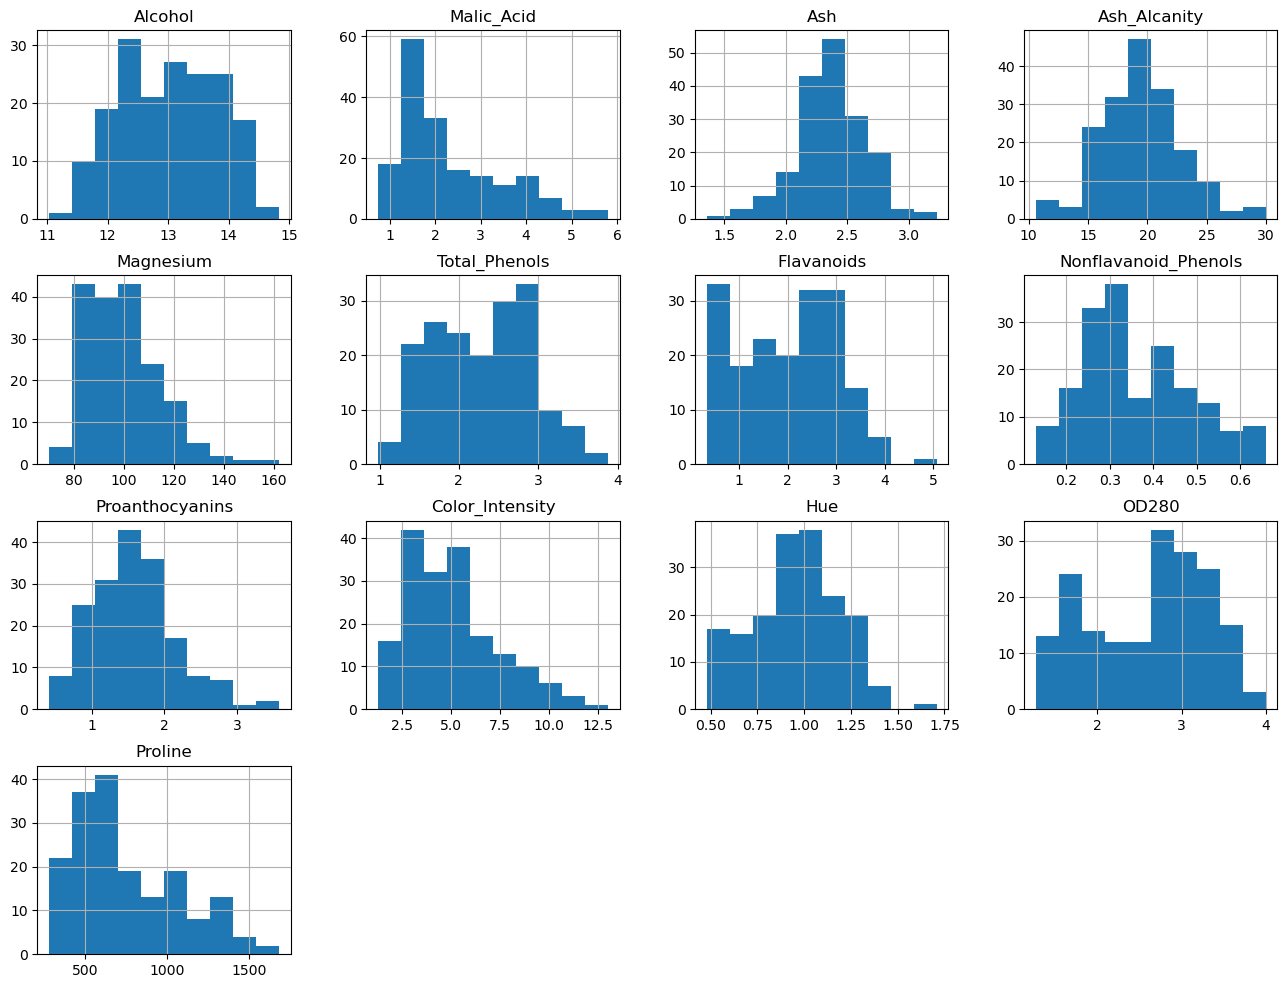

In [12]:
df.hist(figsize=(16, 12))

<Axes: >

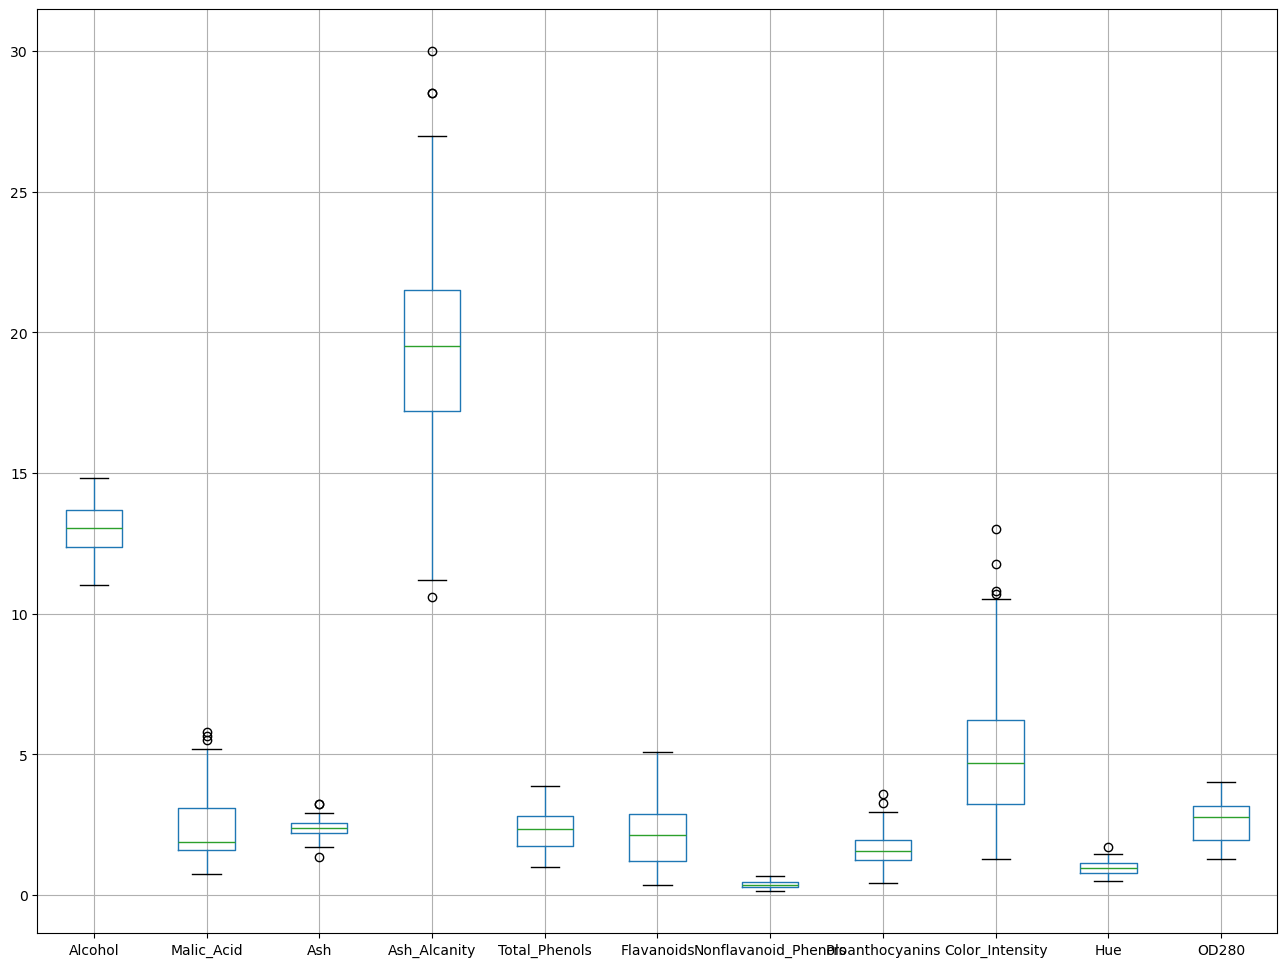

In [13]:
df.drop(columns = ['Proline', 'Magnesium'], axis = 1).boxplot(figsize = (16, 12))

<Axes: >

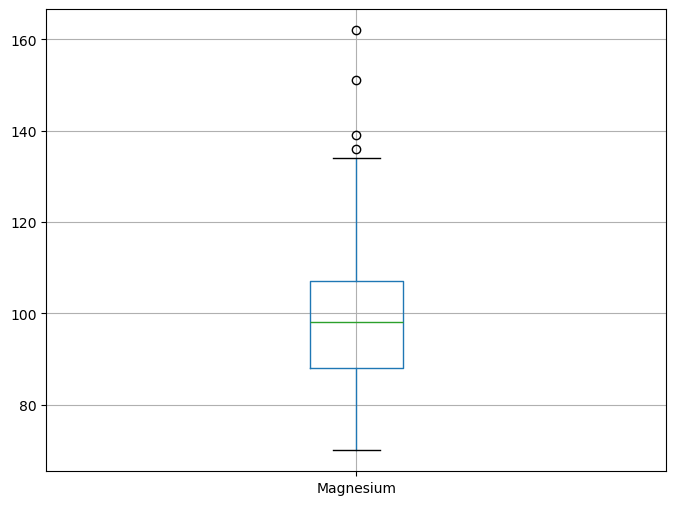

In [14]:
df[['Magnesium']].boxplot(figsize = (8, 6))

<Axes: >

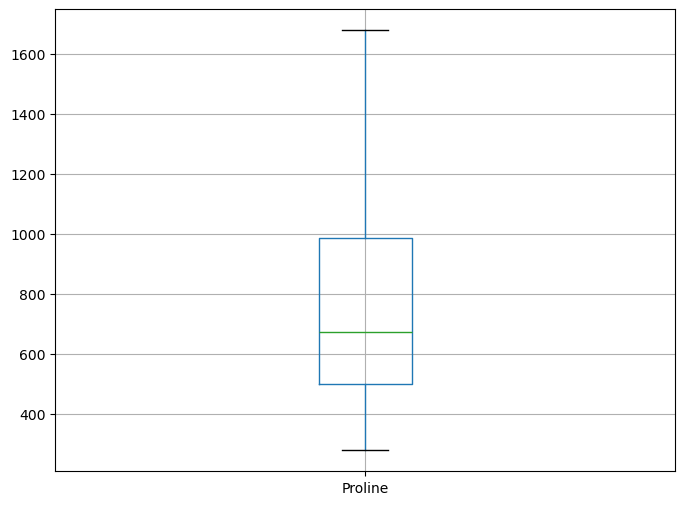

In [15]:
df[['Proline']].boxplot(figsize = (8, 6))

#### 1.3 Scaling and Normalization

In [16]:
se = StandardScaler()

df_scaled = se.fit_transform(df)
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### 2. Model Training and Evaluation

#### 2.1 Elbow Method and K-Mean Optimization

To find the optimized number of k, which is the cluster count, we will find with a range of value and plot with elbow method using wcss.

Let's assume cluster count should be between 2 and 10. 

In [17]:
wcss = []

for k in range(2, 11):
    kmean = KMeans(n_clusters = k, random_state = 17)
    kmean.fit(df_scaled)
    wcss.append(kmean.inertia_)

wcss

c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

[1659.9511977619793,
 1278.7607763668148,
 1222.9072721995321,
 1159.9781886037028,
 1066.2844919386193,
 1025.4050764948688,
 952.4652949689098,
 928.8998883234217,
 894.7731848711051]

Text(0.5, 1.0, 'Scatterplot of WCSS Points')

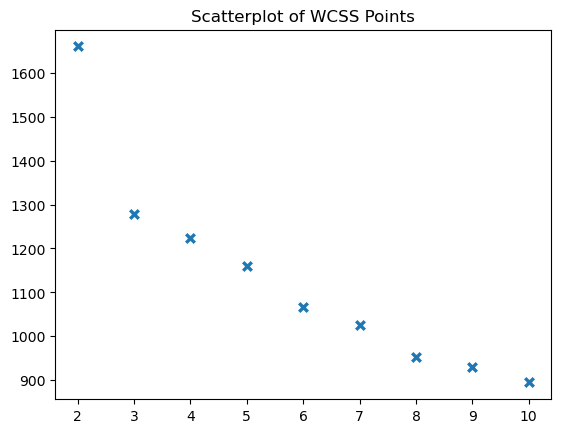

In [18]:
sns.scatterplot(x = range(2, 11), y = wcss, marker = 'X', s = 80)

plt.title('Scatterplot of WCSS Points')

Text(0.5, 1.0, 'Lineplot of WCSS Points')

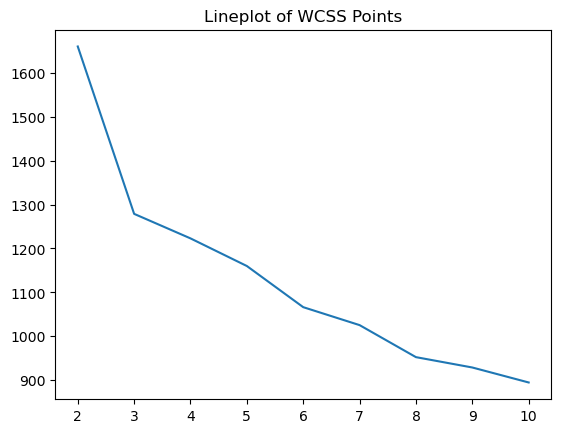

In [19]:
sns.lineplot(x = range(2, 11), y = wcss)

plt.title('Lineplot of WCSS Points')

It is seen that the elbow point is 3. 

So the number of cluster should be 3.

#### 2.2 Silhouethe Method 

For Silhouethe method, I will also use the approximate k between 1 and 10, and test for best k.

In [20]:
sl_score = []

for k in range(2, 11):
    kmean = KMeans(n_clusters = k, random_state = 17)
    kmean.fit(df_scaled)
    sl_score.append(silhouette_score(df_scaled, kmean.labels_))

sl_score

c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

[np.float64(0.2596521860778704),
 np.float64(0.28594199657074876),
 np.float64(0.1916570805168222),
 np.float64(0.1329610806399053),
 np.float64(0.13139774382243755),
 np.float64(0.11709060902956904),
 np.float64(0.13205391968061775),
 np.float64(0.1342202547991125),
 np.float64(0.13589528083363864)]

Text(0.5, 1.0, 'Scatterplot of Silhouethe Scores')

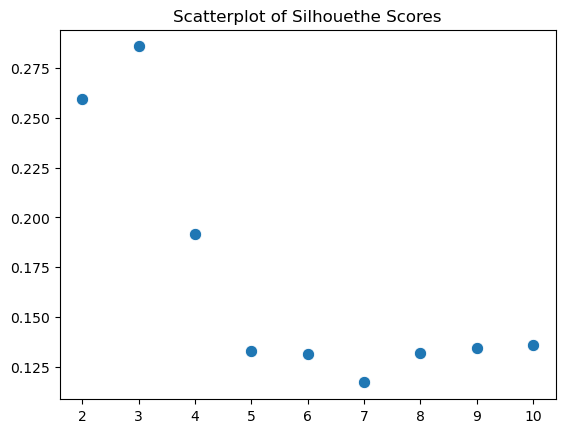

In [21]:
sns.scatterplot(x = range(2, 11), y = sl_score, marker = 'o', s = 80)

plt.title('Scatterplot of Silhouethe Scores')

The silhouethe method also confirms that cluster 3 is the most optimal count.

#### 2.3 Model Training

In [22]:
# optimal_k = 3

kmean = KMeans(n_clusters = 3)
kmean.fit(df_scaled)
kmean

c:\Users\Kelvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
kmean.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [24]:
df['wine_cluster'] = kmean.labels_
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,wine_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


now, we have a cluster column called 'wine_cluster'.

In [25]:
# wcss score 

kmean.inertia_

1279.9661527749454

WCSS score assess the intra-cluster adhesion.

In [26]:
# silhouethe score

silhouette_score(df_scaled, kmean.labels_)

np.float64(0.2844212860533542)

Silhouette score assess the inter-cluster distance between each cluster.

#### 2.4 Model Testing

For model testing, I will create a testing csv file (with 5 instances) and upload here. 

In [27]:
wine_test = pd.read_csv('wine_test.csv')
wine_test

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1600
1,12.08,2.59,2.36,21.0,82,2.50,1.85,0.45,1.25,2.50,1.15,2.80,450
2,13.05,2.05,2.45,19.5,100,2.65,2.50,0.35,1.55,4.80,1.00,3.05,750
3,14.10,4.61,2.68,20.5,95,1.68,0.86,0.58,1.10,9.85,0.65,1.55,660
4,5.67,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,100


In [28]:
wine_test_scaled = se.fit_transform(wine_test)
wine_test_scaled

array([[ 0.75711883, -0.85537983, -0.62757936, -1.29261767,  1.37178285,
         0.48022927,  0.2766361 , -1.41381566,  1.57778558, -0.04955597,
         0.51226789,  1.10235303,  1.78611664],
       [ 0.07999508, -0.01150735, -0.84723213, -0.00476981, -1.38403091,
        -0.12510174, -0.58164513,  0.23240805, -0.84241649, -1.36824877,
         1.16749427, -0.2425657 , -0.52698486],
       [ 0.38548812, -0.52933819, -0.56482142, -0.36250532, -0.28170541,
         0.17756376, -0.12058497, -0.73595884, -0.14428128, -0.40232729,
         0.27400376,  0.05763937,  0.07643292],
       [ 0.71617646,  1.92556357,  0.15689484, -0.12401498, -0.58790693,
        -1.77967319, -1.28387523,  1.49128501, -1.19148409,  1.71850029,
        -1.81080743, -1.74359107, -0.10459242],
       [-1.93877849, -0.52933819,  1.88273807,  1.78390778,  0.8818604 ,
         1.24698189,  1.70946923,  0.42608143,  0.60039628,  0.10163174,
        -0.14295848,  0.82616436, -1.23097228]])

In [36]:
kmean.predict(wine_test_scaled)

array([2, 0, 0, 1, 0], dtype=int32)

It predicts different clusters for different instances.

##### 2.5 Model Package

In [30]:
with open('kmean.pkl', 'wb') as f:
    pickle.dump(kmean, f) 
    

In [33]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,wine_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [ ]:
df.to_csv('wine_deployed_data.csv') 

In [39]:
pd.read_csv('wine_deployed_data.csv').head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,wine_cluster
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


We should have drop index when we load back to deployment stage.